# Clustering

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups.

In this assignment, we will explore two clustering algorithms: k-means and hierachical clustering. Also, you will apply k-means on two real world applications: handwritten digit regconition and image compression.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from IPython.display import display 
from PIL import Image

--------------

## K-means

K-means algorithm partitions the input data into K clusters by iterating between the following two steps:

- Computer the cluster center by computing the arithmetic mean of all the points belonging to the cluster.
- Assign each point to the closest cluster center.

To see how k-means algorithm works, we first generate some synthetic dataset where we pre-define 4 clusters.

c:\users\dotslash\pycharmprojects\uw_school\venv\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


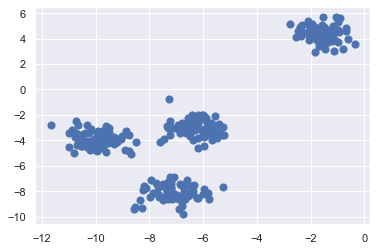

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=1)
plt.scatter(X[:, 0], X[:, 1], s=50);

**TODO:** Apply [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) API from sklearn on this synthetic data and if it can accurate cluster this dataset.

In [5]:
from sklearn.cluster import KMeans

# TODO
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

Now we can visualize the partitioned dataset together with its cluster center.

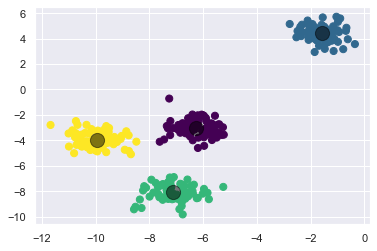

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

--------------

## Hierarchical Clustering

Hierarchical Clustering is another very popular clustering algorithm. Unlike k-means, it also provides a hierarchy of clusters.

**TODO**: apply hierarchical clustering to cluster this dataset using [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) and then generate the scatter plot of the clustering results.

[3 0 3 3 3 0 3 0 3 0 2 1 0 1 2 0 0 0 3 2 2 3 2 3 3 0 1 1 2 3 3 2 2 0 0 0 1
 2 2 3 2 0 3 0 0 1 0 2 3 0 1 2 0 1 1 0 1 0 3 2 3 2 0 2 1 3 3 0 2 3 1 1 3 3
 3 2 3 1 2 3 0 2 2 2 3 1 3 0 0 0 2 3 0 2 2 1 2 1 0 1 1 0 0 1 1 0 2 1 0 2 3
 0 0 2 2 0 0 0 3 1 3 0 0 0 2 1 3 1 2 3 1 0 2 0 2 2 3 1 1 0 0 2 0 1 2 3 1 2
 0 1 3 1 1 2 1 2 1 2 3 0 1 2 0 2 0 3 3 1 3 2 0 3 3 0 2 2 0 3 2 3 0 0 1 1 3
 2 3 2 3 3 3 1 2 1 2 3 3 3 3 0 3 2 3 2 1 1 2 0 1 2 1 1 1 2 3 0 1 3 1 3 1 2
 2 3 2 1 2 3 1 3 0 3 3 1 2 2 1 1 3 1 2 1 1 3 1 2 1 0 2 1 3 2 3 0 3 1 0 1 2
 1 2 2 0 1 3 0 1 3 3 2 2 0 1 3 0 1 2 0 0 0 2 1 3 1 0 1 0 2 1 0 1 1 0 0 3 0
 0 3 2 1]


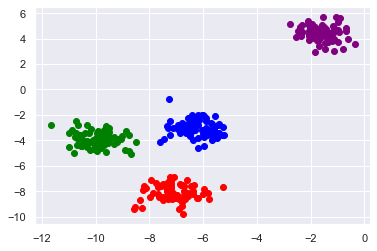

In [11]:
from sklearn.cluster import AgglomerativeClustering

# TODO
agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_clustering.fit(X)
labels = agg_clustering.labels_

plt.scatter(X[labels==0, 0], X[labels==0, 1], color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], color='purple')
plt.show()

**TODO**: Generate the dendrogram using [dendrogram](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function and [linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function for this dataset. Can you tell what's the right number of clusters from the dendrogram?

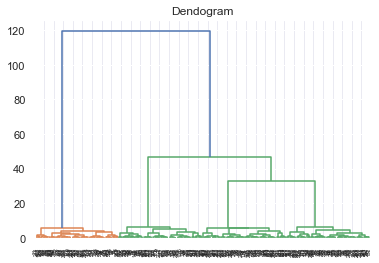

In [13]:
import scipy.cluster.hierarchy as shc

# TODO
dendogram = shc.dendrogram(shc.linkage(X, method="ward"))
plt.title('Dendogram')
plt.show()

--------------

## Clustering Digits

Now you are familiar with the k-means API and applied it on a small synthetic dataset. Now let's see how we can apply k-means algorithm to help use clssify handwritten digits without labels being provided.

We will use the digits from sklearn datsets and apply k-means clustering algorithm. Each digit image consists of 64 features where each feature indicates the brightness of one pixel in an 8×8 image.

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

# the label of each image
digits.target

array([0, 1, 2, ..., 8, 9, 8])

**TODO**: Perform K-means with the number of clusters of 10.


In [21]:
kmeans = KMeans(n_clusters=10, random_state=0)
y_kmeans = kmeans.fit_predict(digits.data)

The result is 10 clusters in 64 dimensions where each cluster center is a 64-dimensional point and can be interpreted as the "typical" digit within the cluster. We can visualize the cluster center with the following code.

If you did the k-means clustering correctly, you should easily recognize the digits in each cluster. It's pretty amazing that we can cluster majority of the images into the right category without the explicit labels.

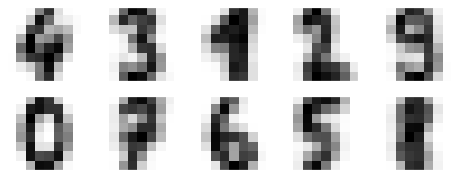

In [22]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

**TODO**: Can you evaluate the prediction accuracy of the k-means model by comparing with the ground truth? Also, try to find out which two digits are most likely to be confused with each other.

Hint: you can use the label from majority of the data in a cluster and assign that label to all data points within that cluster.  

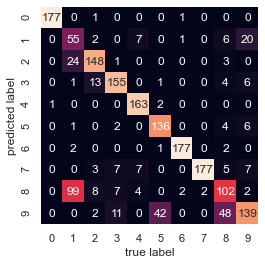

In [31]:
from sklearn.metrics import accuracy_score

# TODO
from scipy.stats import mode

labels = np.zeros_like(y_kmeans)
for i in range(10):
    mask = (y_kmeans == i)
    labels[mask] = mode(digits.target[mask])[0]

accuracy_score(digits.target, labels)

from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(digits.target, labels)
sns.heatmap(c_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
print("It appears 8 and 1 will be confused the most (99 mismatched predictions)")

--------------

## Image Compression

Color compression within images is another interesting application where you can apply clustering techniques to reduce the storage of images without necessarily impact its visualization. If you have an image with millions of colors, very likely many of the pixels in the image will have similar or even identical colors, so you can use assign the same color to all pixels close by.

(427, 640, 3)


(273280, 3)

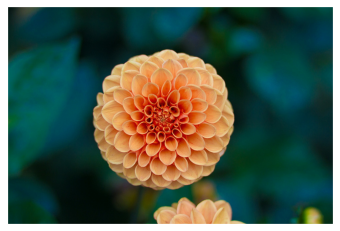

In [32]:
# Note: this requires the ``pillow`` package to be installed
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
print(flower.shape)

# display the image
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

# preprocess the data
data = flower / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

**TODO**: This image above has over 16 million colors (do you know why it's 16 million?). In this task, use [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html) to cluster the flower image and reduce the number of colors to 64 using the k-means clustering. 

Hint: due to the number of pixels in the image, we can use the mini batch k-means(i.e. MiniBatchKMeans) to speed up the k-means algorithm. 

In [34]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans

# TODO
K = 64
kmeans = MiniBatchKMeans(n_clusters=K).fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

After we apply the clustering algorithm to the flower image, the following code puts the original image and the  re-colored one side-by-side. In the re-colored image, each pixel is assigned the color of its closest cluster center. 

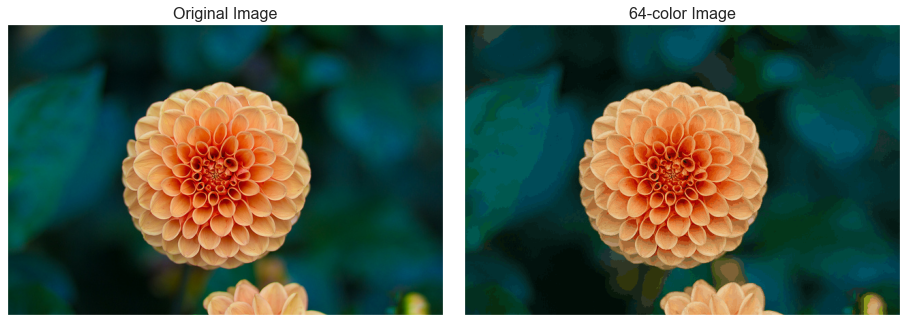

In [35]:
flower_recolored = new_colors.reshape(flower.shape)


fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('{}-color Image'.format(K), size=16);

As you can see, some of the details in the image are missing, but it does not significantly impact the quality of the image, but we reduce the number of colors in the image and thus its size to store it. You can play around with different number of K to balance between the quality and the size of the image. 

# End of Clustering

## Conceptual Overview

Clustering attempts to group together similarly close data points. One way this can be done is by assigning random points
on a graph and recalculating distances iteratively. This helps to discover the centroid, which is the center of a particular group.
Outliers significantly impact grouping and should be pruned prior to running the algorithm. These unsupervised learning methods
generally do not have an assigned y_true, so getting metrics to determine the accuracy is sometimes a manual process (there are ways to roughly prove accuracy though).
Determining the optimal amount of K (clusters) is one of the most important parts of the algorithm, which can lead to creating
defined groupings, but as the professor mentioned, too many groups can be overwhelming for the business and lead to poor interpretability.